In [296]:
# Importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [298]:
# Loading dataset
df = pd.read_csv(r"C:\Users\YY\Desktop\train.csv")

In [300]:
# First 10 rows of the dataset
df.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


# Data Cleaning

In [305]:
# Converting "date" column from object (string data type) to datetime data type
df["date"] = pd.to_datetime(df["date"])

In [307]:
# Checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [309]:
# Dropping the "id" column since it's not necessary for analysis
df = df.drop(columns = "id")
df

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [311]:
# Seeing if there's any missing values 
df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [333]:
# Taking a subset of the dataset because it's too big for the analysis and takes so much time
sample_df = df.sample(100000, random_state=42)  # 100k rows instead of 3 Millions

In [335]:
# Confirming
sample_df

,date,store_nbr,family,sales,onpromotion
2483653,2016-10-28,46,CLEANING,2576.000,61
2761877,2017-04-03,52,DAIRY,0.000,0
1217988,2014-11-16,33,MEATS,357.354,2
1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0
528175,2013-10-24,29,EGGS,0.000,0
...,...,...,...,...,...
2577911,2016-12-20,40,HOME APPLIANCES,0.000,0
787093,2014-03-19,43,EGGS,73.000,0
1999457,2016-01-31,10,LAWN AND GARDEN,0.000,0
986186,2014-07-09,3,HARDWARE,3.000,0


# Descriptive Statistics

In [338]:
# Summary 
sample_df.describe()

,date,store_nbr,sales,onpromotion
count,100000,100000.000000,100000.000000,100000.000000
mean,2015-04-22 09:03:55.008000,27.501690,354.822987,2.572800
min,2013-01-01 00:00:00,1.000000,0.000000,0.000000
25%,2014-02-25 00:00:00,14.000000,0.000000,0.000000
50%,2015-04-23 00:00:00,28.000000,11.000000,0.000000
75%,2016-06-17 00:00:00,41.000000,196.975250,0.000000
max,2017-08-15 00:00:00,54.000000,37514.926000,642.000000
std,NaN,15.574868,1085.917481,12.150908


In [340]:
# calculate the mean for "sales" & "onpromotion" columns
sample_df[["sales","onpromotion"]].mean()

sales          354.822987
onpromotion      2.572800
dtype: float64

In [342]:
# calculate the median for "sales" & "onpromotion" columns
sample_df[["sales","onpromotion"]].median()

sales          11.0
onpromotion     0.0
dtype: float64

In [344]:
# calculate the mode for "sales" & "onpromotion" columns
sample_df[["sales","onpromotion"]].mode()

,sales,onpromotion
0,0.0,0


# Data Visualization

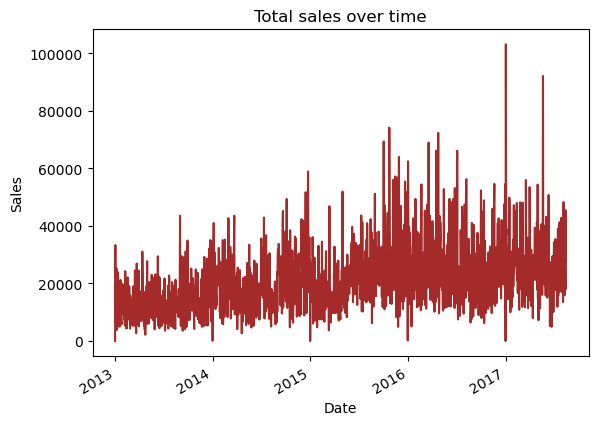

In [353]:
# plotting a "Total sales over time" Line chart
sales_over_time = sample_df.groupby("date")["sales"].sum()
sales_over_time.plot(kind = "line", color = "brown")
plt.title("Total sales over time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

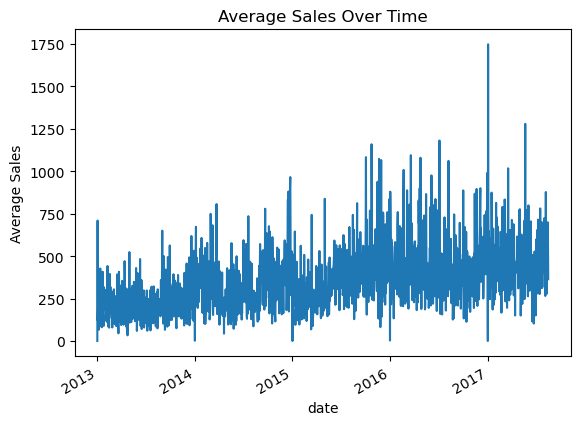

In [355]:
# plotting a Line chart of the average sales over time
sample_df.groupby("date")["sales"].mean().plot(title="Average Sales Over Time")
plt.ylabel("Average Sales")
plt.xlabel("date")
plt.show()

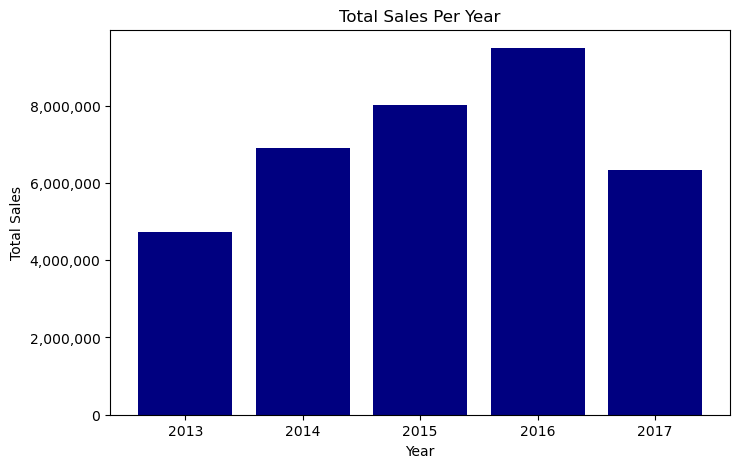

In [357]:
# Aggregate total sales per year
plt.figure(figsize=(8,5))
plt.bar(yearly_sales.index.astype(str), yearly_sales.values, color="navy")
plt.title("Total Sales Per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")

# Format y-axis with commas
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()